In [87]:
import pandas as pd
import numpy as np
from sklearn.metrics  import auc,roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import numbers


In [2]:
df=pd.read_csv('data.csv')
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [3]:
df.columns=df.columns.str.lower().str.replace(' ','_')

In [4]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [5]:
df.head(2).T

,0,1
make,BMW,BMW
model,1 Series M,1 Series
year,2011,2011
engine_fuel_type,premium unleaded (required),premium unleaded (required)
engine_hp,335.0,300.0
engine_cylinders,6.0,6.0
transmission_type,MANUAL,MANUAL
driven_wheels,rear wheel drive,rear wheel drive
number_of_doors,2.0,2.0
market_category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance"


In [6]:
df=df[['make','model', 'year','engine_hp', 'engine_cylinders', 'transmission_type','vehicle_style',
       'highway_mpg', 'city_mpg', 'msrp']]

In [7]:
df=df.fillna(0)

In [8]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [9]:
msrp_avg=df['msrp'].mean()
msrp_avg

40594.737032063116

In [10]:
# df.loc[:,'msrp']>=msrp_avg,
df['above_avg'] = np.where(df['msrp']>=msrp_avg,1,0)
# df['above_avg']=df['msrp'] >= msrp_avg
# df['above_avg']=df['above_avg'].astype('int')
df['above_avg']


0        1
1        1
2        0
3        0
4        0
        ..
11909    1
11910    1
11911    1
11912    1
11913    0
Name: above_avg, Length: 11914, dtype: int64

In [11]:
from sklearn.model_selection  import train_test_split

In [12]:
df_train_full,df_test=train_test_split(df, test_size=0.2,random_state=1)
df_train,df_val=train_test_split(df_train_full, test_size=0.25,random_state=1)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [13]:
y_train=df_train.above_avg.values
y_test=df_test.above_avg.values
y_val=df_val.above_avg.values
#df_train.drop(columns=['msrp','above_avg'],axis=1)
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_avg
0,Toyota,Highlander Hybrid,2016,280.0,6.0,AUTOMATIC,4dr SUV,28,27,50485,1
1,Chevrolet,Impala Limited,2014,300.0,6.0,AUTOMATIC,Sedan,30,18,26840,0
2,Buick,Regal,2016,259.0,4.0,AUTOMATIC,Sedan,27,19,36490,0
3,Volkswagen,CC,2015,280.0,6.0,AUTOMATED_MANUAL,Sedan,25,17,43575,1
4,Dodge,Grand Caravan,2016,283.0,6.0,AUTOMATIC,Passenger Minivan,25,17,22595,0
...,...,...,...,...,...,...,...,...,...,...,...
7143,Subaru,Impreza,2015,148.0,4.0,MANUAL,4dr Hatchback,33,24,20995,0
7144,Infiniti,QX50,2016,325.0,6.0,AUTOMATIC,4dr SUV,24,17,35850,0
7145,Honda,Fit,2017,130.0,4.0,AUTOMATIC,4dr Hatchback,37,32,20265,0
7146,Audi,200,1991,162.0,5.0,AUTOMATIC,Sedan,20,16,2000,0


In [14]:
len(df_train),len(df_val),len(df_test),len(y_train),len(y_test),len(y_val)

(7148, 2383, 2383, 7148, 2383, 2383)

In [15]:
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']
numerical=['year', 'engine_hp', 'engine_cylinders', 'highway_mpg','city_mpg']

In [160]:
X_train=df_train['year'].to_numpy()

### Question 1

In [17]:
for n in numerical:
    auc=roc_auc_score(y_train,df_train[n].to_numpy())
    if(auc<0.5):
        auc=roc_auc_score(y_train, -df_train[n].to_numpy())
    print('%s, %.2f' % (n, auc))

year, 0.69
engine_hp, 0.92
engine_cylinders, 0.77
highway_mpg, 0.63
city_mpg, 0.67


#### The answer for Q1 is engine_hp, 0.92 has the highest AUC.

## Question 2


In [18]:
train_dicts=df_train[categorical+numerical].to_dict(orient='records')
val_dicts=df_val[categorical+numerical].to_dict(orient='records')
test_dicts=df_test[categorical+numerical].to_dict(orient='records')


dv=DictVectorizer(sparse=False)

dv.fit(train_dicts)
dv.fit(val_dicts)
dv.fit(test_dicts)


X_train=dv.transform(train_dicts)
X_val=dv.transform(val_dicts)
X_test=dv.transform(test_dicts)


model=LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train,y_train)

y_pred = model.predict_proba(X_val)[:, 1]



In [161]:
auc=roc_auc_score(y_val, y_pred)
#   print('%s, %.2f' % (n, auc))
print('%.3f' % (auc))

0.978


#### Answer for Q2  having AUC is 0.978

In [20]:
y_val

array([1, 0, 0, ..., 0, 1, 0])

In [21]:
scores=[]
thresholds=np.arange(0,1,step=0.01)
for threshold in thresholds:
    actual_postive=(y_val==1)
    actual_negative=(y_val==0)
    predict_positive=(y_pred>=threshold)
    predict_negative=(y_pred<=threshold)
    
    tp=(actual_postive & predict_positive).sum()
    tn=(actual_negative & predict_negative).sum()
    fp=(actual_negative & predict_positive).sum()
    fn=(actual_postive & predict_negative).sum()
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    f1=(2*precision*recall)/(precision+recall)
    scores.append((threshold,tp,tn,fp,fn,precision,recall,f1))
    
columns=['threshold','tp','tn','fp','fn','precision','recall','f1']
df_scores=pd.DataFrame(scores,columns=columns)

    
    


In [22]:
df_scores

,threshold,tp,tn,fp,fn,precision,recall,f1
0,0.00,654,0,1729,0,0.274444,1.000000,0.430688
1,0.01,652,953,776,2,0.456583,0.996942,0.626321
2,0.02,651,1091,638,3,0.505043,0.995413,0.670098
3,0.03,651,1174,555,3,0.539801,0.995413,0.700000
4,0.04,650,1237,492,4,0.569177,0.993884,0.723831
...,...,...,...,...,...,...,...,...
95,0.95,291,1727,2,363,0.993174,0.444954,0.614572
96,0.96,272,1728,1,382,0.996337,0.415902,0.586839
97,0.97,259,1728,1,395,0.996154,0.396024,0.566740
98,0.98,235,1729,0,419,1.000000,0.359327,0.528684


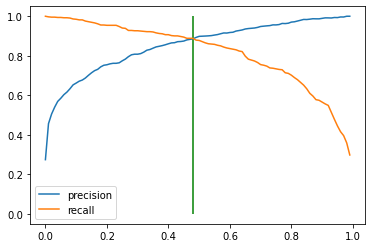

In [162]:
plt.plot(thresholds, df_scores['precision'],label='precision')
plt.plot(thresholds, df_scores['recall'],label='recall')
plt.legend()
plt.vlines(0.48, 0, 1, color='green')
plt.show()

#### Answer for Q4 is 0.48 as both curves intersect

## Q4 F1 Score Calculation

In [24]:
f1_max=df_scores['f1'].max()
f1_max
max_row=df_scores[df_scores['f1'] == f1_max]
max_row['threshold']

50    0.5
Name: threshold, dtype: float64

###### The answer for Q4 is  having threshold is 0.50


## Q5:Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:


In [44]:
kf = KFold(n_splits=5,shuffle=True, random_state=1)



In [26]:
(kf.split(X))

<generator object _BaseKFold.split at 0x7f9d54df8900>

In [36]:
len(df_train_full)

9531

In [151]:
def Q5AND6(p_cvalue):

    scores=[]

    for i, (train_index, val_index) in enumerate(kf.split(df_train_full)):   
        df_train=df_train_full.iloc[train_index]
        df_val=df_train_full.iloc[val_index]
        y_train=df_train_full.above_avg.values   
        y_val=df_val.above_avg.values
        train_dicts=df_train_full[categorical+numerical].to_dict(orient='records')
        val_dicts=df_val[categorical+numerical].to_dict(orient='records')

        dv=DictVectorizer(sparse=False)

        dv.fit(train_dicts)
        dv.fit(val_dicts)

        X_train=dv.transform(train_dicts)
        X_val=dv.transform(val_dicts)       
               
        model=LogisticRegression(solver='liblinear', C=p_cvalue, max_iter=1000)
        model.fit(X_train,y_train)

        y_pred = model.predict_proba(X_val)[:, 1]

        auc=roc_auc_score(y_val, y_pred)
        scores.append((auc))
    std=np.std(scores)
    mean=np.std(scores)
    print(f'The Standard Devaition and Mean of AUC scores of Fold {p_cvalue}  are  :{std:.3f},{mean:.3f}')            
    return ((p_cvalue, std,mean ))
   
#         return scores
  
#        

    
    
    
    
    

In [157]:
ls=[ Q5AND6(i) for i in [1.0]]


The Standard Devaition and Mean of AUC scores of Fold 1.0  are  :0.004,0.004


#### The answer of SD for C=1.0 is 0.3

## Q6 :Different C's usage on LR Model

In [159]:
ls=[ Q5AND6(i) for i in [0.01, 0.1, 0.5, 10]]
ls


The Standard Devaition and Mean of AUC scores of Fold 0.01  are  :0.002,0.002
The Standard Devaition and Mean of AUC scores of Fold 0.1  are  :0.003,0.003
The Standard Devaition and Mean of AUC scores of Fold 0.5  are  :0.003,0.003
The Standard Devaition and Mean of AUC scores of Fold 10  are  :0.005,0.005


[(0.01, 0.002026156051383827, 0.002026156051383827),
 (0.1, 0.0025523402559104146, 0.0025523402559104146),
 (0.5, 0.0029449242670592434, 0.0029449242670592434),
 (10, 0.004736374413855517, 0.004736374413855517)]

#### C=10 has best mean score